In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing, Holt
import matplotlib.pyplot as plt

In [17]:
# Load the data from the CSV file
data = pd.read_csv('WPU083.csv')

# Extract the date and price index columns
dates = data['DATE']
price_index = data['WPU083']

# Convert the date strings to datetime objects
dates = pd.to_datetime(dates)

# Set the index to the date
data.set_index('DATE', inplace=True)

In [22]:
# Fine-tune the model by adjusting the `alpha` parameter (equivalent to smoothing_level)
for alpha in np.arange(0.1, 1.1, 0.1):
    # Create a new exponential smoothing model with the specified alpha (equivalent to smoothing_level)
    model = ExponentialSmoothing(price_index, trend=None, seasonal=None, seasonal_periods=12, initialization_method="heuristic")

    # Fit the model to the data
    model_fit = model.fit()

    # Forecast the price index for six months
    forecast = model_fit.forecast(steps=6)

    # Calculate the mean squared error (MSE) of the forecast
    mse = np.mean((forecast - price_index[-6:])**2)

    # Print the MSE for the current alpha (equivalent to smoothing_level)
    print('Alpha (Smoothing Level):', alpha, 'MSE:', mse)

Alpha (Smoothing Level): 0.1 MSE: nan
Alpha (Smoothing Level): 0.2 MSE: nan
Alpha (Smoothing Level): 0.30000000000000004 MSE: nan
Alpha (Smoothing Level): 0.4 MSE: nan
Alpha (Smoothing Level): 0.5 MSE: nan
Alpha (Smoothing Level): 0.6 MSE: nan
Alpha (Smoothing Level): 0.7000000000000001 MSE: nan
Alpha (Smoothing Level): 0.8 MSE: nan
Alpha (Smoothing Level): 0.9 MSE: nan
Alpha (Smoothing Level): 1.0 MSE: nan


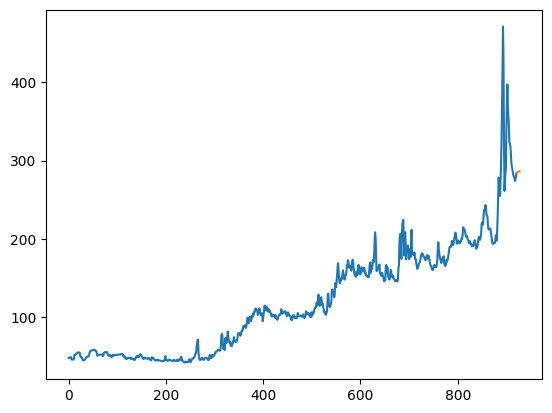

In [23]:
# Create a double exponential smoothing model
model = Holt(price_index)

# Fit the model to the data
model_fit = model.fit()

# Forecast the price index for six months
forecast = model_fit.forecast(steps=6)

# Plot the historical and forecast data
plt.plot(price_index)
plt.plot(forecast)
plt.show()

In [26]:
pip install --upgrade statsmodels


In [27]:
# Fine-tune the model by adjusting the `damped` parameter
for damped in [False, True]:
    # Create a new double exponential smoothing model with the specified damping
    model = Holt(price_index, damped=damped)

    # Fit the model to the data
    model_fit = model.fit()

    # Forecast the price index for six months
    forecast = model_fit.forecast(steps=6)

    # Calculate the mean squared error (MSE) of the forecast
    mse = np.mean((forecast - price_index[-6:])**2)

    # Print the MSE for the current damping configuration
    print('Damped:', damped, 'MSE:', mse)

Damped: False MSE: nan
Damped: True MSE: nan


<ipython-input-27-d071642fa34c>:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(price_index, damped=damped)
<ipython-input-27-d071642fa34c>:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(price_index, damped=damped)
